In [1]:
%load_ext autoreload 
%autoreload 2

import pickle as pkl
import numpy as np
from autodiff.activation import ReLU, Linear
from autodiff.network import Network, NetworkParams

file_path = 'test-parameters.pkl'

with open(file_path, 'rb') as file:
    data = pkl.load(file)

In [2]:
network_def: NetworkParams = {
    "input_shape": 2,
    "output_shape": 1,
    "layers": [
        {
            "input_shape": 2,
            "n_neurons": len(data['w1']),
            "weight_init": data['w1'],
            "bias_init": data['b1'] ,
            "activation": ReLU(),
        },
        {
            "input_shape": len(data['w1']),
            "n_neurons": len(data['w2']),
            "weight_init": data['w2'],
            "bias_init": data['b2'] ,
            "activation": ReLU(),
        },
        {
            "input_shape": len(data['w2']),
            "n_neurons": len(data['w3']),
            "weight_init": data['w3'],
            "bias_init": data['b3'] ,
            "activation": Linear(), 
        }
    ]
} 


In [3]:
network = Network(network_def)
network.print_params()

input_shape: 2
output_shape: 1
Num layers: 3

Layer [0]
Neurons:    10; Inputs: 2
Weights:(10, 2) [[-0.00529397  0.37932295]
 [-0.58198076 -0.52038747]
 [-0.27234524  0.18961591]
 [-0.01401001  0.56065756]
 [-0.06275153  0.18710935]
 [-0.2136969  -0.13899273]
 [-0.67553341 -0.46830416]
 [-0.29148576  0.02619374]
 [ 0.27954417  0.42428023]
 [-0.47937673 -0.30791873]]
Biases:(10,)  [ 0.25683326  0.58717293 -0.14552271  0.52913636 -0.11397386  0.07482189
  0.64026839 -0.65596199 -0.44515052 -0.17901486]
W grads: (10, 2) [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
B grads: (10,)   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Activation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Last input: [0. 0.]

Layer [1]
Neurons:    10; Inputs: 10
Weights:(10, 10) [[-0.12326556  0.27322105 -0.2049724  -0.14557004 -0.2209295  -0.2961666
  -0.18459494  0.27182874  0.14110664  0.15326691]
 [ 0.01663092 -0.16212475  0.05350089 -0.29526019 -0.22849551 -0.1630249
   0.19952008  0.1854

In [4]:
def get_loss(y, y_hat): 
    return 0.5*((y_hat - y)**2)

epochs = 6 # so that the loss after the final update is calculated
loss_vals = []
batch_size = len(data['inputs'])
for iteration in range(epochs): 
    print(f'EPOCH: {iteration}')
    current_loss = 0
    network.zero_grad()
    for index, input in enumerate(data['inputs']):
        y_pred = network.forward(input)
        y = data['targets'][index] 
        loss = get_loss(y, y_pred)
        current_loss += loss
        
        network.backward(y_pred - y)

        # print the gradients of the first input-output pair
        if iteration==0 and index==0: 
            print("#"*20)
            print("First Layer w_grads:   ", network.layers[0].w_grads)
            print("First Layer b_grads:   ", network.layers[0].b_grads)
            print("#"*20)

    print(f"    Average loss: {current_loss/batch_size}")
    network.update_params(learning_rate=0.01, batch_size=batch_size)
    loss_vals.append(current_loss/batch_size)
   

EPOCH: 0
####################
First Layer w_grads:    [[-0.0210035  -0.09259178]
 [-0.0184767  -0.08145263]
 [ 0.          0.        ]
 [ 0.01776593  0.0783193 ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [-0.00974717 -0.04296942]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]
First Layer b_grads:    [-0.21514022 -0.18925803  0.          0.18197762  0.          0.
 -0.09984094  0.          0.          0.        ]
####################
    Average loss: [0.5380008]
EPOCH: 1
    Average loss: [0.53495483]
EPOCH: 2
    Average loss: [0.53199438]
EPOCH: 3
    Average loss: [0.5291157]
EPOCH: 4
    Average loss: [0.52631708]
EPOCH: 5
    Average loss: [0.52359375]


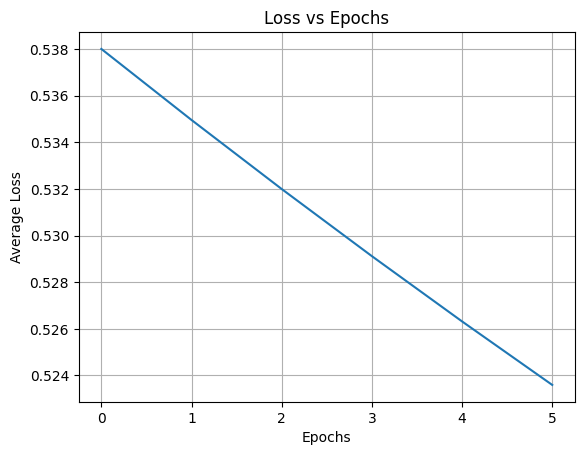

In [5]:
from matplotlib import pyplot as plt
plt.plot(loss_vals)
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.title('Loss vs Epochs')
plt.grid()
plt.show()